# Explorattory Data Analysis On Diwali Sales Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# To avoid encoding error (ENC), I am using "unicode_escape"
df = pd.read_csv(r'C:\Users\rahul\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Drop unrelated/ blank column
df.drop(['Status' , 'unnamed1'], axis=1, inplace = True)

In [7]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis


# Based on Gender

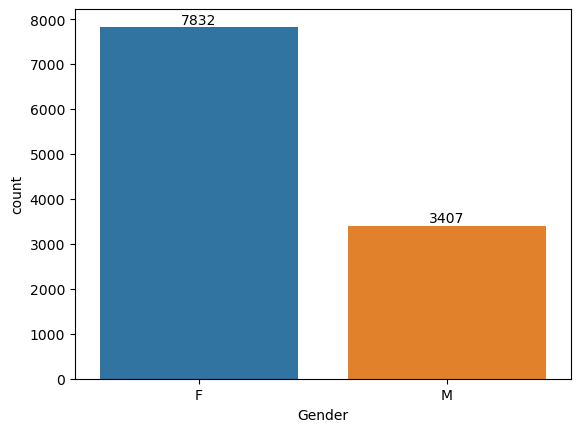

In [11]:
ax = sns.countplot(x = 'Gender' , data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [12]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

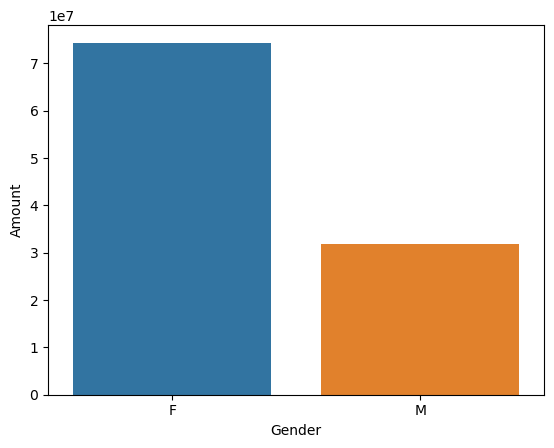

In [13]:
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
sns.barplot(x='Gender',y='Amount', data= sales_gen)


**From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men**

# Based on Age

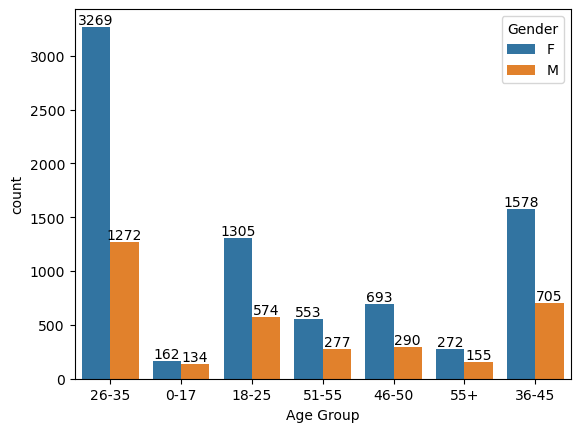

In [14]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

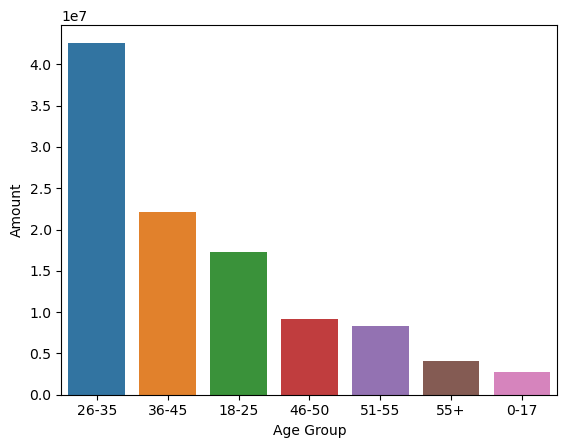

In [15]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x ='Age Group', y = 'Amount' , data = sales_age)

From the above graphs we can see that most of the buyers are of age group between 26-35 yrs female.

# Based On State

<Axes: xlabel='State', ylabel='Orders'>

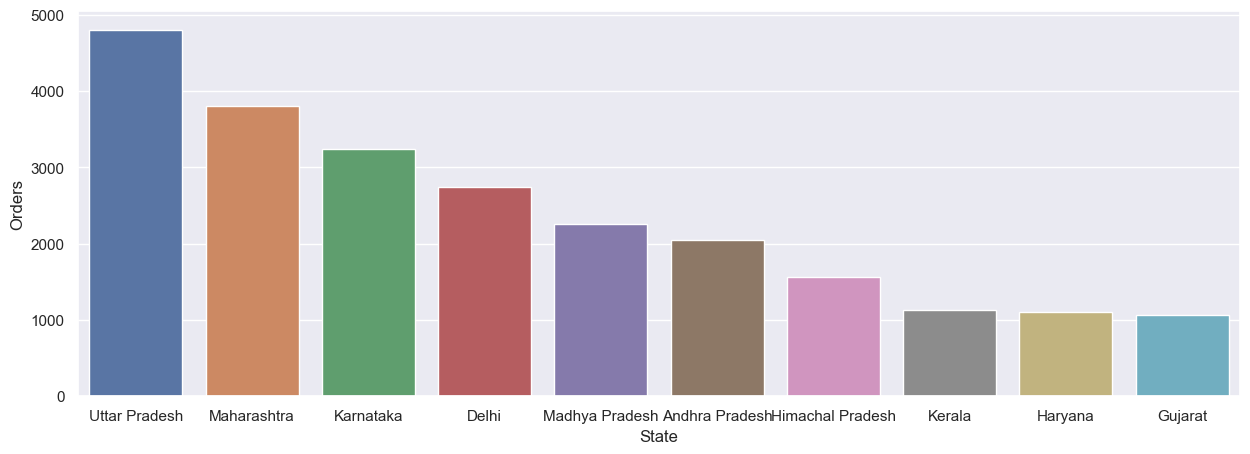

In [16]:
# Total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= sales_state, x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

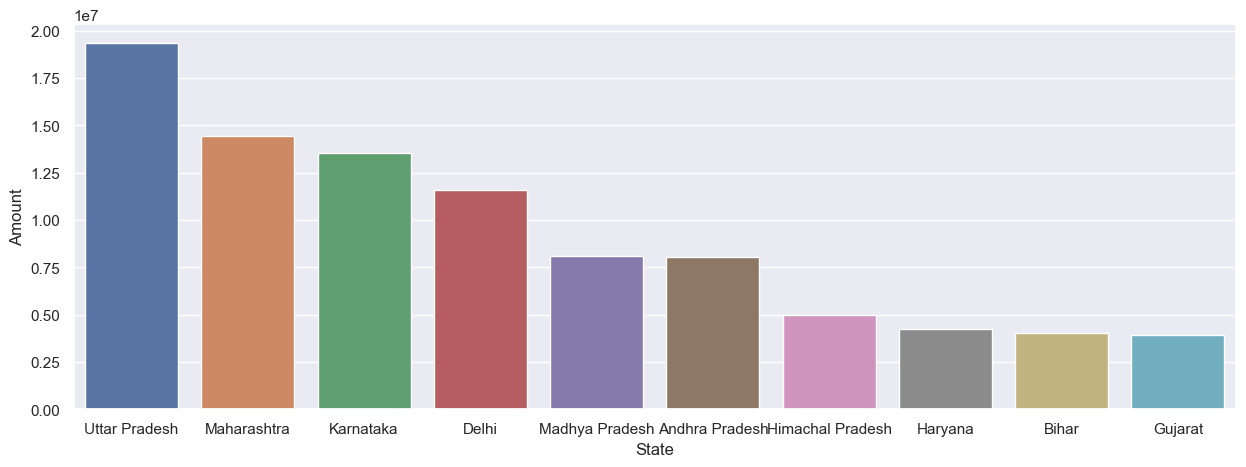

In [17]:
# Total amount/sales from top 10 states


sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= sales_state, x='State',y='Amount')

**From above graphs we can see thatun most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively but total sales/amount is from Uttar Pradesh, Maharashtra and then Karnataka**

# Based On Marital Status

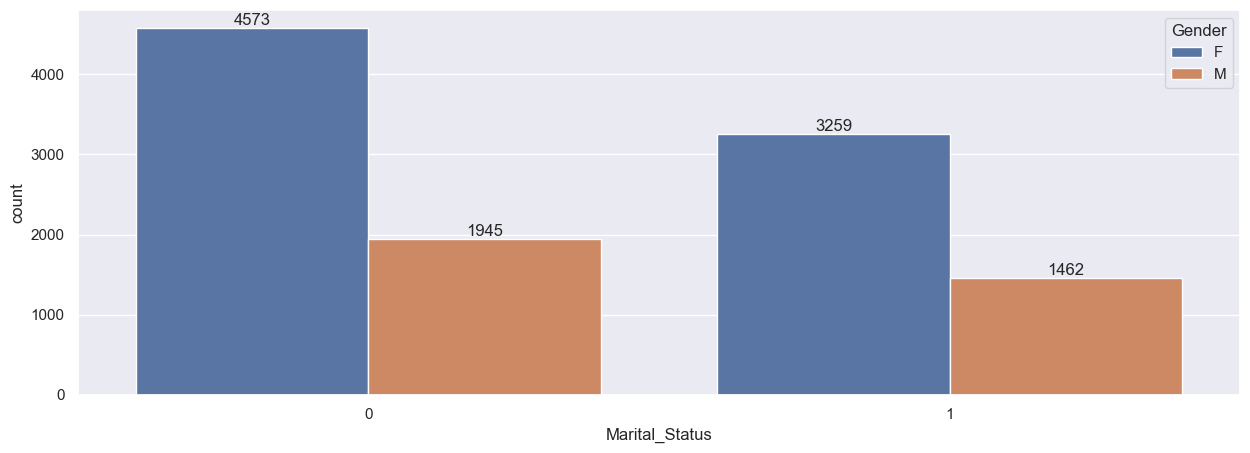

In [18]:
ax = sns.countplot(data=df, x='Marital_Status', hue ='Gender')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

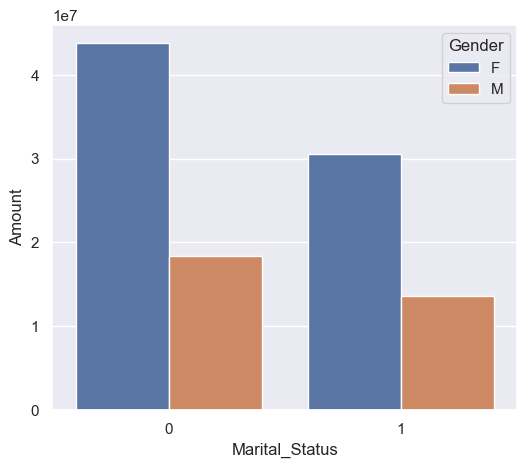

In [19]:
sales_Marital_status = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data= sales_Marital_status, x='Marital_Status',y='Amount', hue = 'Gender')

*From above graphs we see that most of the buyers are married women and they have high purchasing power*

# Based On Occupation

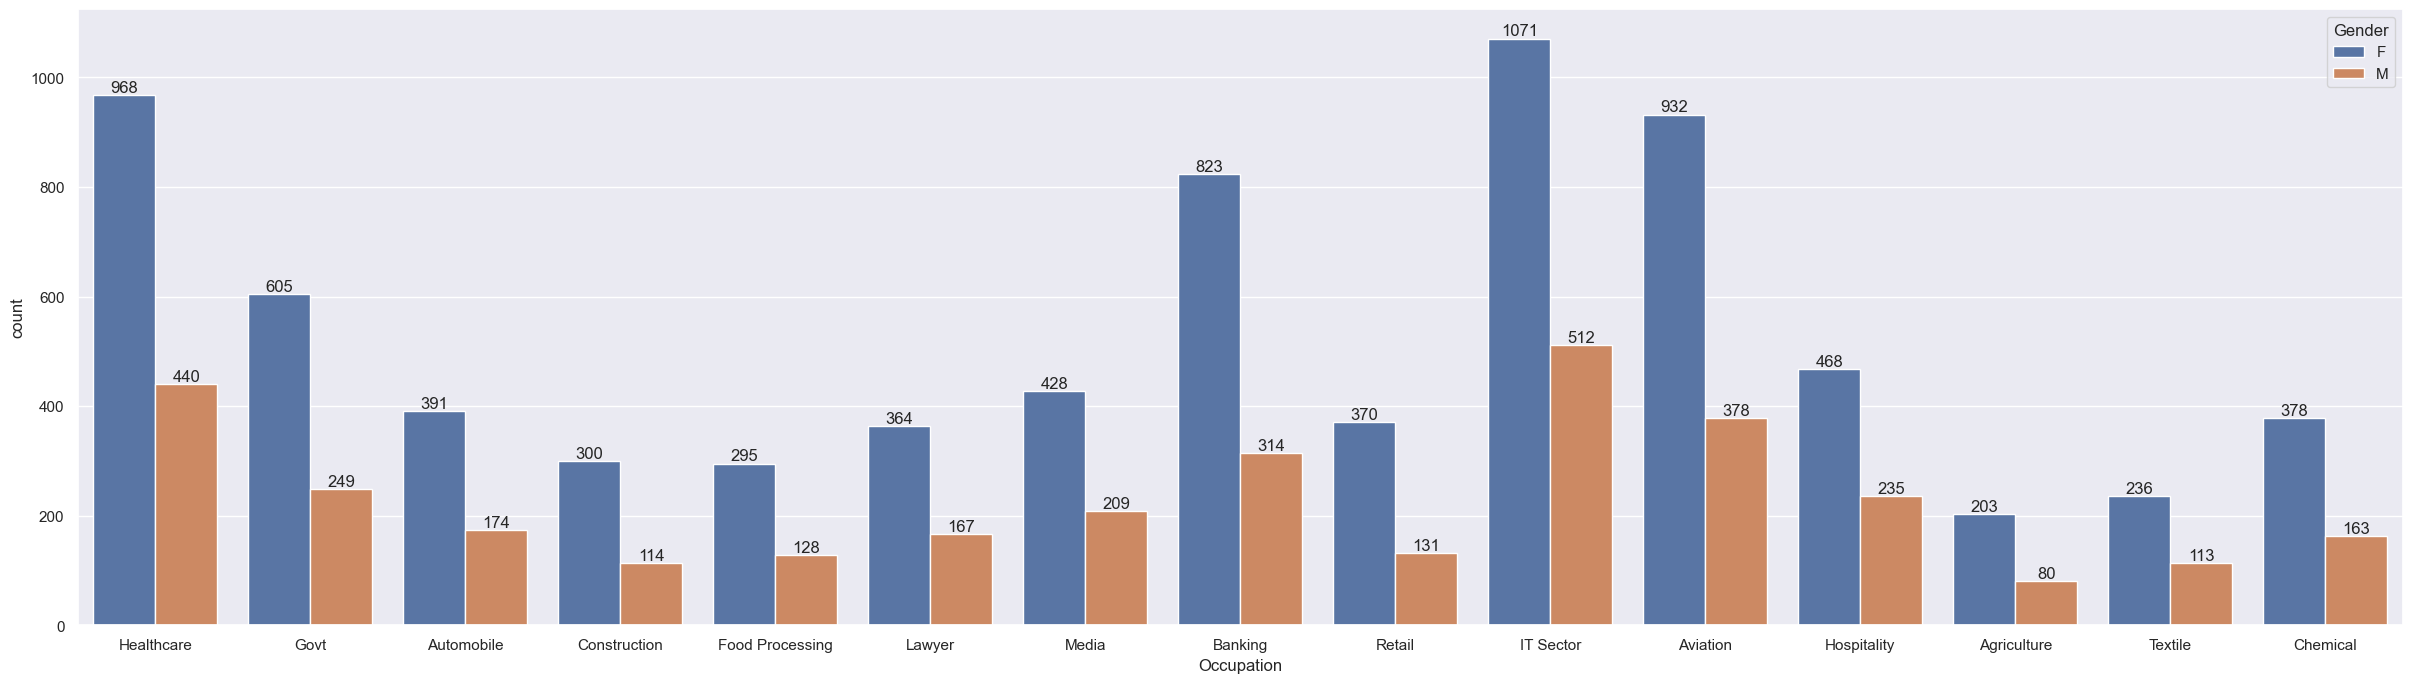

In [26]:
ax = sns.countplot(data= df, x= 'Occupation', hue = 'Gender')

sns.set(rc={'figure.figsize':(30,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

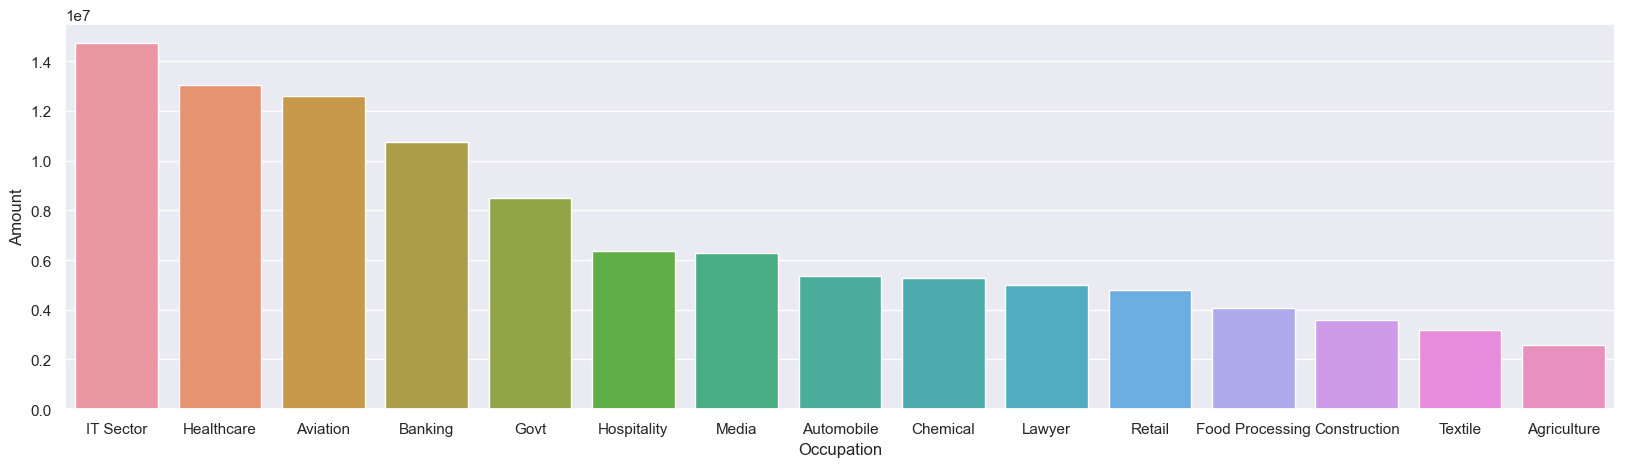

In [21]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_occupation,x='Occupation',y='Amount')

*From the above graphs we can see that most of buyers are working in IT, Healthcare and Aviation Sector*

# Product Category

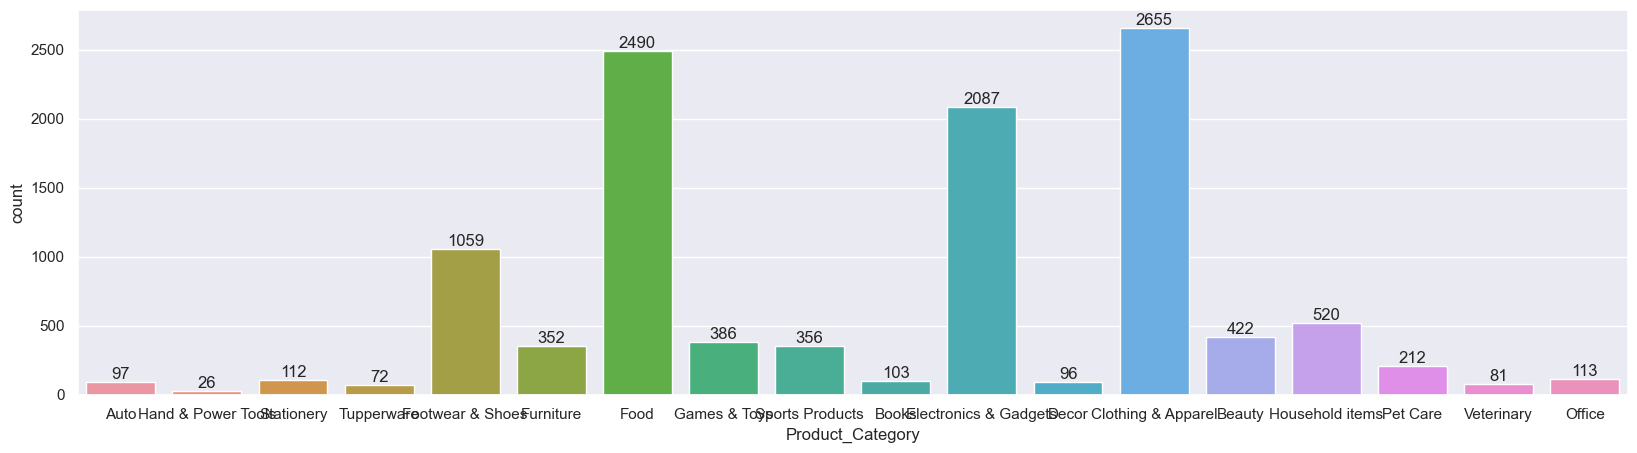

In [22]:
ax = sns.countplot(data=df,x='Product_Category')

sns.set(rc={'figure.figsize':(22,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

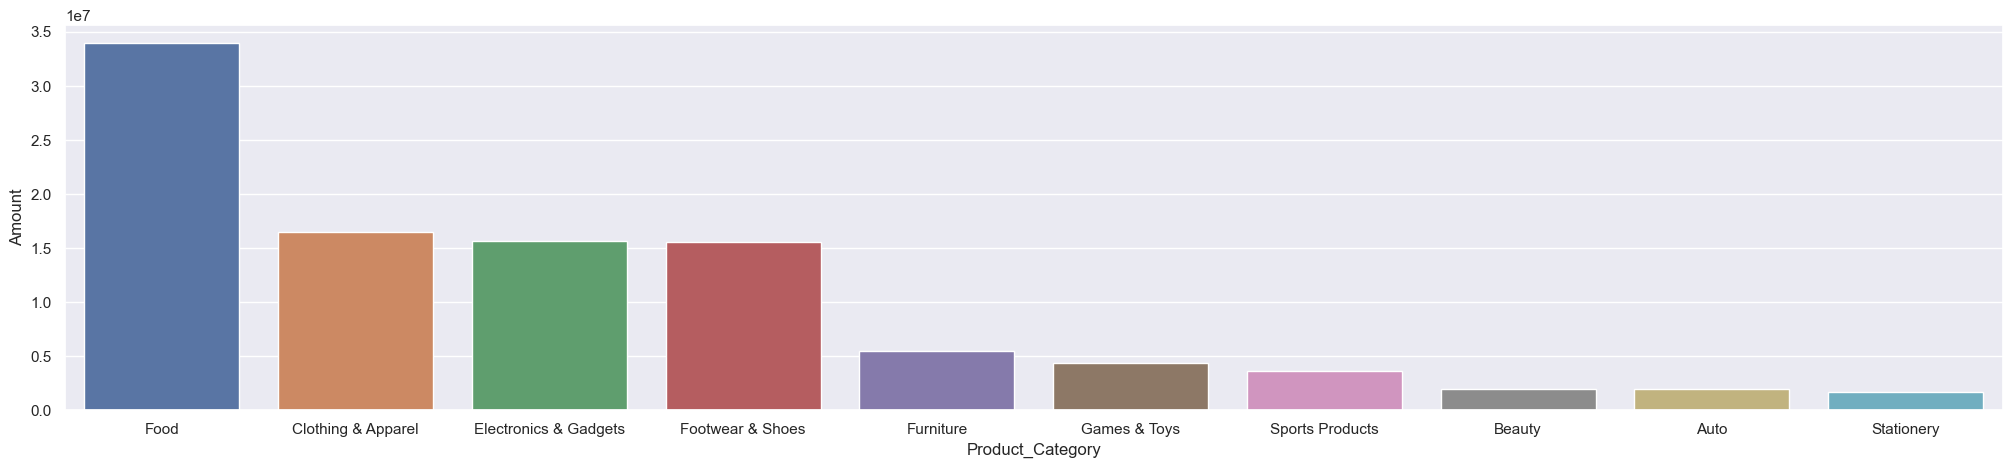

In [23]:
sales_product_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_product_category ,x='Product_Category',y='Amount')

*From the above graphs we can see that most of sold products are food, clothes*

In [24]:
# Top 10 most sold products(same thing as above)

#fig1,ax1 = plt.subplots(figsize=(12,7))
#df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(assending=False).plot(kind='bar')

# Conclusion

*Married Women age group 26-35 yrs from UP, Maharastra and Karnataka working in It, Healthcare and Aviation are more
likely buy products from Food, Clothing and Electronics category*